TEAM MEMBERS:

Aishwarya Shastry Viswanath - as6285@drexel.edu

Matope Angela - atm344@drexel.edu

#Breast Cancer Classification Using Clinical Data

#1. Background
Breast cancer is one of the most common and life-threatening cancer-types affecting women worldwide. Early detection of cancer cells can improve treatment outcomes and survival rates. Traditionally, breast cancer diagnosis has relied on microscopic examination of breast tissue. However, with the increasing availability of structured clinical data, machine learning models provide a robust and quicker alternative to traditional diagnostics, with potentially more accurate tumor classification.

This project aims to apply various machine learning algorithms to clinical data to distinguish between benign and malignant breast tumors (cancerous and non-cancerous). The ultimate goal is to develop efficient models that can be used in real-world clinical settings.
________________________________________
#2. Objectives
•	To classify breast cancer tumors as malignant or benign using clinical and diagnostic features.

•	To compare machine learning algorithms in terms of accuracy, interpretability, clinical relevance. Other performance metrics such as precision, recall, and F1-score will be considered.

•	To identify the most predictive clinical features.
________________________________________
#3. Dataset Description
We use a publicly available breast cancer dataset which contains clinical records of breast cancer patients.

####Source: https://www.kaggle.com/datasets/fatemehmehrparvar/breast-cancer-prediction/data

The dataset consists of 213 patient records obtained from the cancer registry of the University of Calabar Teaching Hospital over 24 months (January 2019–August 2021). This dataset contains ten features: year of diagnosis, the age, menopause status, tumor size in centimeters, number of invasive nodes, breast affected (left or right), metastasis (yes or no), breast quadrant affected, history of the disease, and the diagnosis result (benign or malignant).

In [ ]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Reading the breast cancer dataset
df = pd.read_csv('/content/drive/MyDrive/Breast Cancer/breast-cancer-dataset.csv')

In [ ]:
df.columns

Index(['S/N', 'Year', 'Age', 'Menopause', 'Tumor Size (cm)', 'Inv-Nodes',
       'Breast', 'Metastasis', 'Breast Quadrant', 'History',
       'Diagnosis Result'],
      dtype='object')

In [ ]:
df.head()

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S/N               213 non-null    int64 
 1   Year              213 non-null    object
 2   Age               213 non-null    int64 
 3   Menopause         213 non-null    int64 
 4   Tumor Size (cm)   213 non-null    object
 5   Inv-Nodes         213 non-null    object
 6   Breast            213 non-null    object
 7   Metastasis        213 non-null    object
 8   Breast Quadrant   213 non-null    object
 9   History           213 non-null    object
 10  Diagnosis Result  213 non-null    object
dtypes: int64(3), object(8)
memory usage: 18.4+ KB


In [ ]:
df.shape

(213, 11)

•	Total Features: 10 clinical and demographic features

• Total number of rows: 213

•	Target Variable: Diagnosis Result – Malignant, or Benign

####Unique identification for each patient
• S/N

####Numerical Features:
•	Age - Patient's age at the time of diagnosis

•	Menopause - Whether patient is pre or postmenopausal at diagnosis.

    0 - reached menopause
    1- patient has not yet reached menopause

####Categorical Features:
• Year	- The year diagnosis was made

• Tumor Size - size of tumor in centimeters   
• Inv-Nodes - whether there are invasive lymph nodes (affected by cancer):

    0 - no cancer spread to lymph nodes  
    1 - at least one surrounding lymph node is affected by cancer, indicating a higher stage of cancer.
   
• Breast - Specifies whether the cancer is in the left or right breast.            
• Metastasis - Shows whether the cancer has spread to other parts of the body, which usually makes it more serious.

    0 = No metastasis (cancer has not spread)

    1 = Metastasis present (cancer has spread)

• Breast Quadrant - The specific area of the breast where the tumor is located. Can be Upper Left, Upper Right, Lower Left, Lower Right, or Central

• History - Shows whether the patient had a history of breast cancer before the current diagnosis.

    0 = No history of breast cancer
    1 = Yes, there was a previous history   

• Diagnosis Result - whether the breast cancer diagnosis was benign (not dangerous) or malignant (cancerous and serious).


    0 = Benign (non-cancerous)

    1 = Malignant (cancerous)
________________________________________
#4. Methodology
##4.1 Exploratory Data Analysis
•	Summary statistics, data cleaning

•	Histograms, box plots by class

•	Correlation analysis with the target variable




In [ ]:
# Summary statistics
df.describe()

,S/N,Age,Menopause
count,213.000000,213.000000,213.000000
mean,107.000000,39.784038,0.666667
std,61.631972,14.096712,0.472515
min,1.000000,13.000000,0.000000
25%,54.000000,30.000000,0.000000
50%,107.000000,40.000000,1.000000
75%,160.000000,49.000000,1.000000
max,213.000000,77.000000,1.000000


In [ ]:
# Missing value check
df.isnull().sum()

,0
S/N,0
Year,0
Age,0
Menopause,0
Tumor Size (cm),0
Inv-Nodes,0
Breast,0
Metastasis,0
Breast Quadrant,0
History,0


No missing values in the dataset

In [ ]:
rows, columns = df.shape[0], df.shape[1]

In [ ]:
# Cleaning column names by removing whitespace
df.columns = df.columns.str.replace(" ", "")
df.columns

Index(['S/N', 'Year', 'Age', 'Menopause', 'TumorSize(cm)', 'Inv-Nodes',
       'Breast', 'Metastasis', 'BreastQuadrant', 'History', 'DiagnosisResult'],
      dtype='object')

In [ ]:
# Converting select columns to numeric and replacing invalid entries with NaN to ensure the data is clean and ready for modeling:
cols_to_verifier = ['Year', 'Age', 'Menopause', 'TumorSize(cm)', 'Inv-Nodes', 'Metastasis', 'History']

for col in cols_to_verifier:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()

,S/N,Year,Age,Menopause,TumorSize(cm),Inv-Nodes,Breast,Metastasis,BreastQuadrant,History,DiagnosisResult
0,1,2019.0,40,1,2.0,0.0,Right,0.0,Upper inner,0.0,Benign
1,2,2019.0,39,1,2.0,0.0,Left,0.0,Upper outer,0.0,Benign
2,3,2019.0,45,0,4.0,0.0,Left,0.0,Lower outer,0.0,Benign
3,4,2019.0,26,1,3.0,0.0,Left,0.0,Lower inner,1.0,Benign
4,5,2019.0,21,1,1.0,0.0,Right,0.0,Upper outer,1.0,Benign


In [ ]:
# Checking unique values in the columns and cleaning the data:
df['Menopause'].unique()

array([1, 0])

In [ ]:
Menopause_counts = df['Menopause'].value_counts(dropna=False)
total_Menopause_counts = Menopause_counts.sum()

print(Menopause_counts)
print("Total occurrences:", total_Menopause_counts)

Menopause
1    142
0     71
Name: count, dtype: int64
Total occurrences: 213


Thus the menopause column has clean and encoded unique values (0s and 1s)

In [ ]:
df['Inv-Nodes'].unique()

array([ 0.,  1., nan,  3.])

In [ ]:
Inv_Nodes_counts = df['Inv-Nodes'].value_counts(dropna=False)
total_Inv_Nodes_counts = Inv_Nodes_counts.sum()

print(Inv_Nodes_counts)
print("Total occurrences:", total_Inv_Nodes_counts)

Inv-Nodes
0.0    139
1.0     72
NaN      1
3.0      1
Name: count, dtype: int64
Total occurrences: 213


The Inv-nodes column (Invasive Lymph Nodes) has sensible encoded and mostly unique values (0s, 1s and 3s) except for one missing value and one outlier which need cleaning.

In [ ]:
# Replacing the NaN and outlier with the most frequent value:
df['Inv-Nodes'] = df['Inv-Nodes'].apply(lambda x: x if x == 0. or x == 1. else np.nan)  #converts the outlier value of 3 to NaN

most_frequent_inv = df['Inv-Nodes'].mode()[0]
df['Inv-Nodes'] = df['Inv-Nodes'].fillna(most_frequent_inv)

#Recalculating value counts after the cleaning:
Inv_Nodes_counts = df['Inv-Nodes'].value_counts(dropna=False)
total_Inv_Nodes_counts = Inv_Nodes_counts.sum()

#Checking the result
print(Inv_Nodes_counts)
print("Total occurrences:", total_Inv_Nodes_counts)

Inv-Nodes
0.0    141
1.0     72
Name: count, dtype: int64
Total occurrences: 213


NaN and outlier have thus been cleaned

In [ ]:
df['Breast'].unique()

array(['Right', 'Left', '#'], dtype=object)

In [ ]:
breast_counts = df['Breast'].value_counts(dropna=False)
total_breast_counts = breast_counts.sum()

print(breast_counts)
print("Total occurrences:", total_breast_counts)

Breast
Left     107
Right    100
#          6
Name: count, dtype: int64
Total occurrences: 213


The breast column contains 6 # entries which need cleaning:

In [ ]:
# Replacing the #s with the most frequent value:
df['Breast'] = df['Breast'].apply(lambda x: x if x == "Right" or x == "Left" else np.nan)

most_frequent_breast = df['Breast'].mode()[0]
df['Breast'] = df['Breast'].fillna(most_frequent_breast)

#Recalculating value counts after the cleaning:
breast_counts = df['Breast'].value_counts(dropna=False)
total_breast_counts = breast_counts.sum()

#Checking the result
print(breast_counts)
print("Total occurrences:", total_breast_counts)


Breast
Left     113
Right    100
Name: count, dtype: int64
Total occurrences: 213


'Breast' column is now clean

In [ ]:
df['Metastasis'].unique()

array([ 0.,  1., nan])

In [ ]:
metastasis_counts = df['Metastasis'].value_counts(dropna=False)
total_metastasis_counts = metastasis_counts.sum()

print(metastasis_counts)
print("Total occurrences:", total_metastasis_counts)

Metastasis
0.0    139
1.0     73
NaN      1
Name: count, dtype: int64
Total occurrences: 213


In [ ]:
# Replacing the NaN with the most frequent value:
df['Metastasis'] = df['Metastasis'].apply(lambda x: x if x == 0. or x == 1. else np.nan)

most_frequent_metastasis = df['Metastasis'].mode()[0]
df['Metastasis'] = df['Metastasis'].fillna(most_frequent_metastasis)

#Recalculating value counts after the cleaning:
metastasis_counts = df['Metastasis'].value_counts(dropna=False)
total_metastasis_counts = metastasis_counts.sum()

#Checking the result
print(metastasis_counts)
print("Total occurrences:", total_metastasis_counts)

Metastasis
0.0    140
1.0     73
Name: count, dtype: int64
Total occurrences: 213


Metastasis column is now clean

In [ ]:
df['BreastQuadrant'].unique()

array(['Upper inner', 'Upper outer', 'Lower outer', 'Lower inner', '#',
       'Upper outer '], dtype=object)

In [ ]:
df['BreastQuadrant'].value_counts()
total_breast_counts = df['BreastQuadrant'].value_counts().sum()

print(df['BreastQuadrant'].value_counts())
print("Total occurrences:", total_breast_counts)

BreastQuadrant
Upper outer     67
Lower outer     54
Upper inner     45
Lower inner     44
#                2
Upper outer      1
Name: count, dtype: int64
Total occurrences: 213


In [ ]:
#Clean and count
df['BreastQuadrant'] = df['BreastQuadrant'].str.replace(r'\s+', ' ', regex=True)
df['BreastQuadrant'] = df['BreastQuadrant'].str.strip()
df['BreastQuadrant'] = df['BreastQuadrant'].str.lower()

# Replacing the # with the most frequent value:
df['BreastQuadrant'] = df['BreastQuadrant'].apply(lambda x: np.nan if x == '#' else x)
most_frequent_quadrant = df['BreastQuadrant'].mode()[0]
df['BreastQuadrant'] = df['BreastQuadrant'].fillna(most_frequent_quadrant)

#Recalculating value counts after the cleaning:
breast_counts = df['BreastQuadrant'].value_counts(dropna=False)
total_breast_counts = breast_counts.sum()

#Checking the result

print(breast_counts)
print("Total occurrences:", total_breast_counts)

BreastQuadrant
upper outer    70
lower outer    54
upper inner    45
lower inner    44
Name: count, dtype: int64
Total occurrences: 213


DiagnosisResult
Benign       120
Malignant     93
Name: count, dtype: int64
DiagnosisResult
Benign       56.338028
Malignant    43.661972
Name: count, dtype: float64


<ipython-input-7-ba4768a5d482>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, palette='bright')


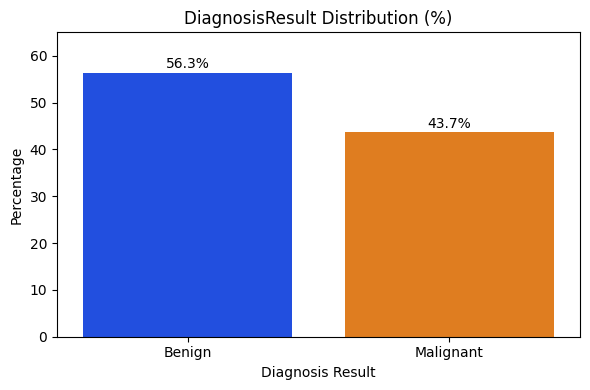

In [ ]:
# Checking for imbalance in the target feature

# Plotting the percentage distributions:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each class
counts = df['DiagnosisResult'].value_counts()

# Display raw counts
print(counts)

# Calculate percentage distribution
percentages = counts / counts.sum() * 100
print(percentages)

# Plot the percentage distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=percentages.index, y=percentages.values, palette='bright')
plt.title('DiagnosisResult Distribution (%)')
plt.ylabel('Percentage')
plt.xlabel('Diagnosis Result')
for i, val in enumerate(percentages.values):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center')
plt.ylim(0, 65)
plt.tight_layout()
plt.show()


BreastQuadrant column is now clean

In [ ]:
#Quantifying imbalance in the data:
print(df['DiagnosisResult'].value_counts(normalize=True))

DiagnosisResult
Benign       0.56338
Malignant    0.43662
Name: proportion, dtype: float64


This indicates that the 'DiagnosisResult' column, which is the target, is slightly imbalanced as 56.3% of the samples are Benign and 43.7% are Malignant. Although is not an extreme imbalance, it’s still worth considering for model training and evaluation, as Recall and Precision for the Malignant class are critical in medical contexts. This avoids a model that's biased toward predicting the majority class (Benign).

Class Weighting will be implemented in the classifiers to handle the imbalance. This method adjusts the loss function, and not the data, which brings about several advantages:

*   Reduces the risk of overfitting which is the case with oversampling

*   It is also a simpler and faster method than SMOTE or oversampling

*   No Loss of Data, unlike undersampling which removes majority class instances


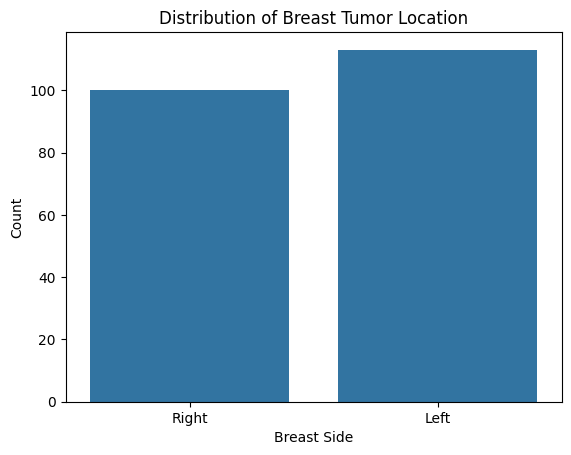

Breast
Left     113
Right    100
Name: count, dtype: int64


In [ ]:
#Creating plots to assess the distribution of data:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each breast side
breast_counts = df['Breast'].value_counts()

# Create a bar plot
sns.countplot(x='Breast', data=df)
plt.title('Distribution of Breast Tumor Location')
plt.xlabel('Breast Side')
plt.ylabel('Count')
plt.show()

# Display the counts numerically
print(breast_counts)

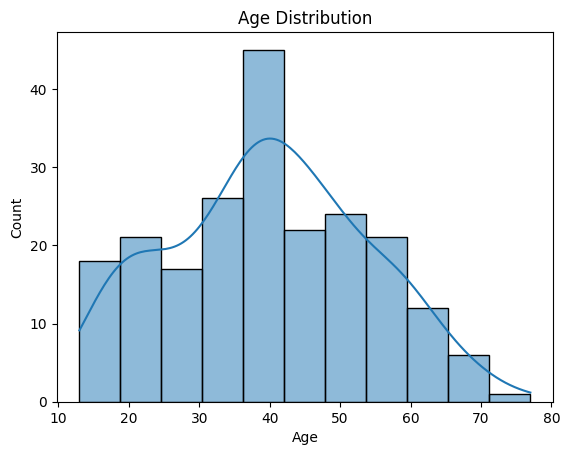

In [ ]:
# Distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


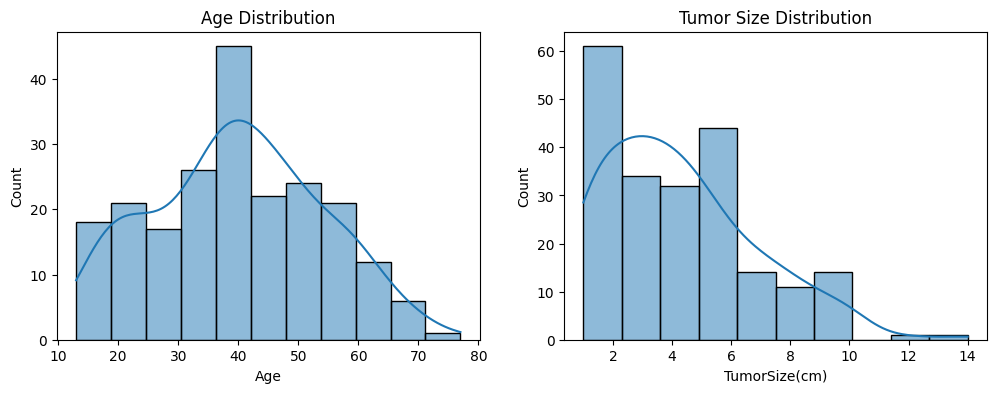

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

# Histograms for numerical features
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['TumorSize(cm)'], kde=True)
plt.title('Tumor Size Distribution')
plt.show()


Tumor size is highly skewed and will thus require log-transformation

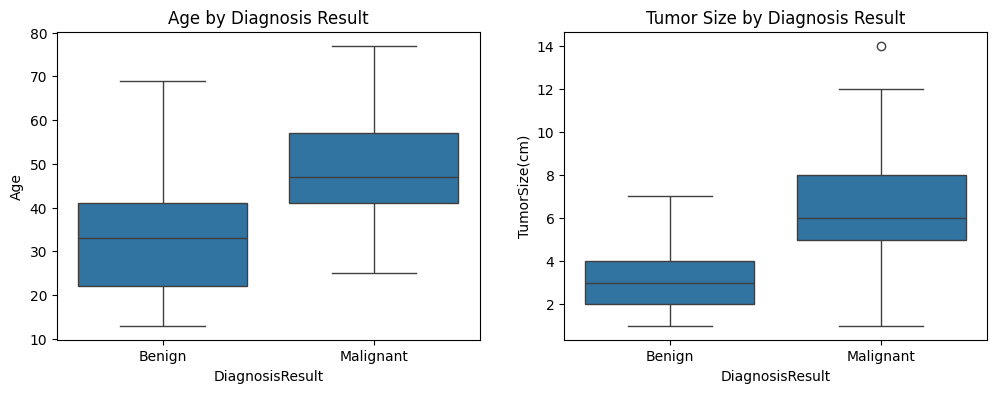

In [ ]:
# Box plots for numerical features by Diagnosis Result
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='DiagnosisResult', y='Age', data=df)
plt.title('Age by Diagnosis Result')
plt.subplot(1, 2, 2)
sns.boxplot(x='DiagnosisResult', y='TumorSize(cm)', data=df)
plt.title('Tumor Size by Diagnosis Result')
plt.show()

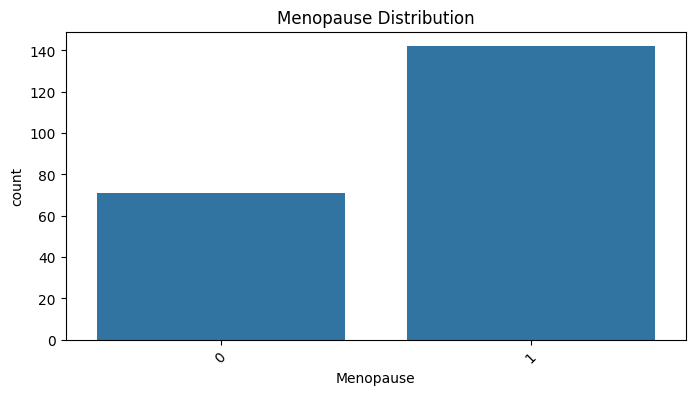

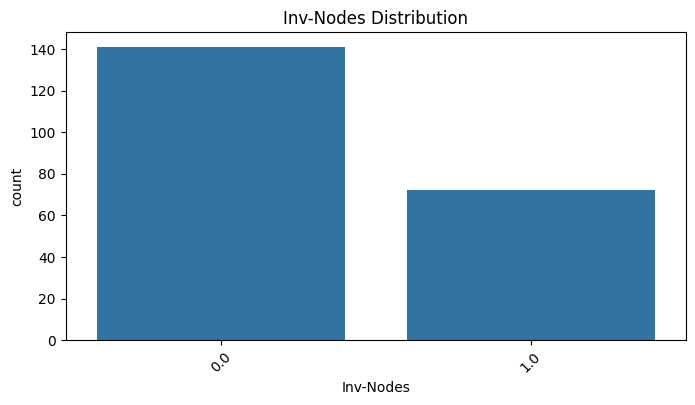

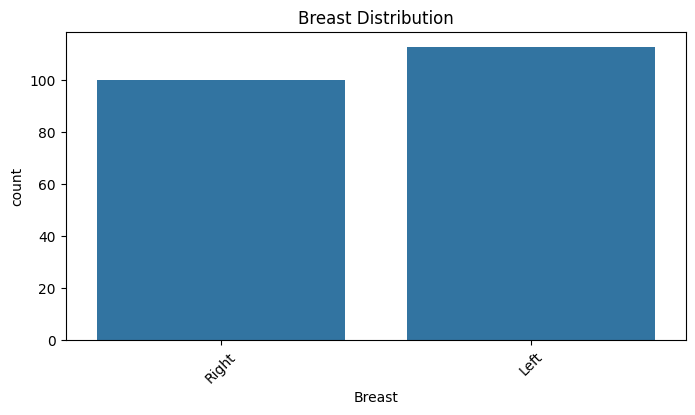

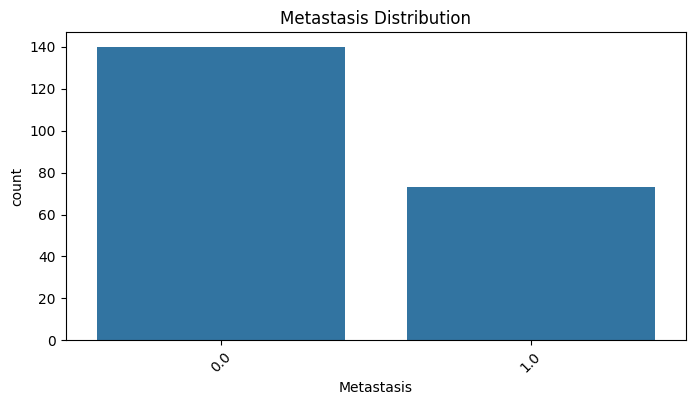

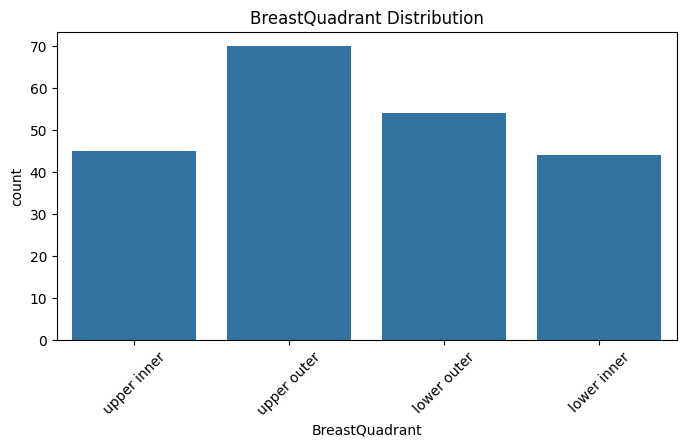

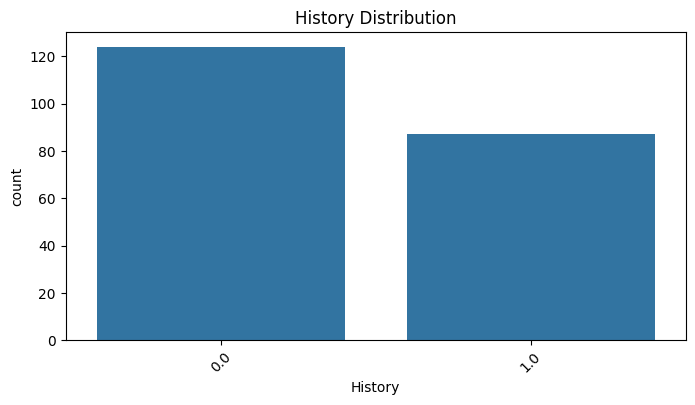

In [ ]:
# Count plots for categorical features
categorical_features = ['Menopause', 'Inv-Nodes', 'Breast', 'Metastasis', 'BreastQuadrant', 'History']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=45)
    plt.show()


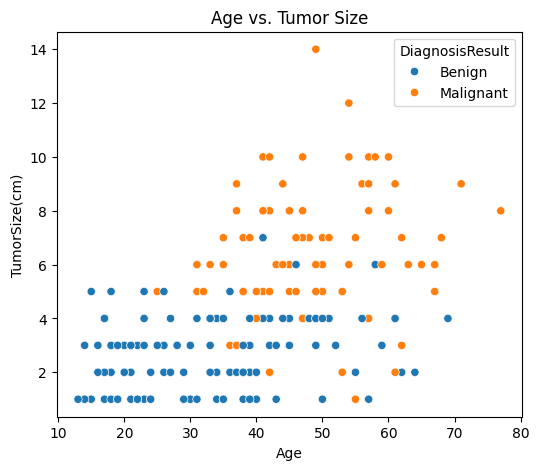

In [ ]:
# Bivariate Analysis

# Scatter plot for Age vs. Tumor Size
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Age', y='TumorSize(cm)', data=df, hue='DiagnosisResult')
plt.title('Age vs. Tumor Size')
plt.show()

Malignant tumors, which are more serious, tend to affect patients aged between 30 and 70. They also tend to be much larger in size than benign tumors as seen in the scatter plot.

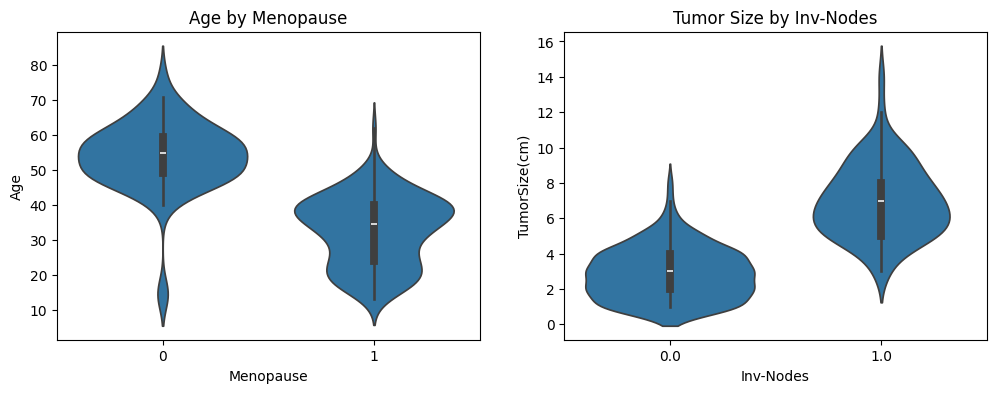

In [ ]:
# Violin plots for numerical features by categorical features
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.violinplot(x='Menopause', y='Age', data=df)
plt.title('Age by Menopause')
plt.subplot(1, 2, 2)
sns.violinplot(x='Inv-Nodes', y='TumorSize(cm)', data=df)
plt.title('Tumor Size by Inv-Nodes')
plt.show()

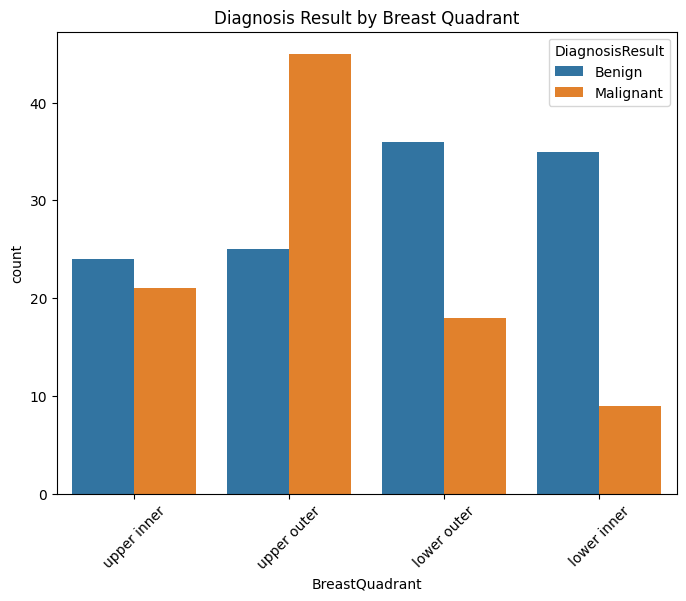

In [ ]:
#Grouped bar chart for Diagnosis Result by BreastQuadrant
plt.figure(figsize=(8, 6))
sns.countplot(x='BreastQuadrant', hue='DiagnosisResult', data=df)
plt.title('Diagnosis Result by Breast Quadrant')
plt.xticks(rotation=45)
plt.show()


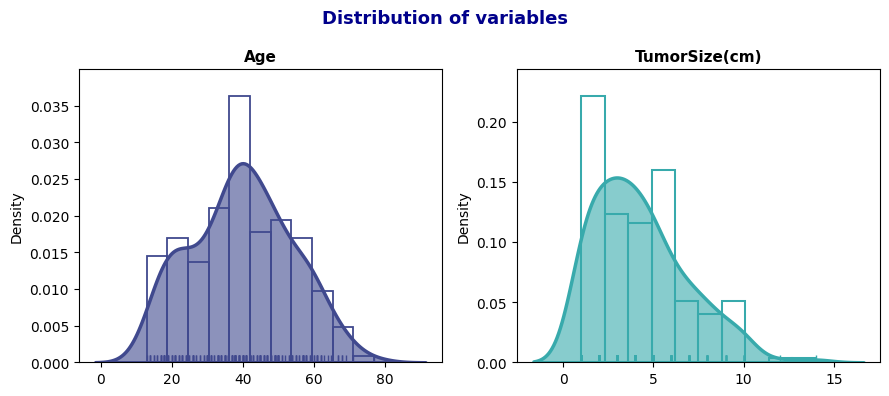

In [ ]:
cols_to_plot = ['Age', 'TumorSize(cm)']
colors = sns.color_palette(palette = 'mako', n_colors = len(cols_to_plot))

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))
ax = ax.flat
for i,col in enumerate(cols_to_plot):
    sns.kdeplot(df, x = col, alpha = 0.6, fill = True, linewidth = 2.5, color = colors[i], ax = ax[i])
    sns.histplot(df, x = col, stat = 'density', fill = False, color = colors[i], ax = ax[i])
    sns.rugplot(df, x = col, color = colors[i], ax = ax[i])
    ax[i].set_xlabel("")
    ax[i].set_title(col, fontsize = 11, fontweight = "bold", color = "black")

fig.suptitle("Distribution of variables", fontsize = 13, fontweight = "bold", color = "darkblue")
fig.tight_layout()
fig.show()

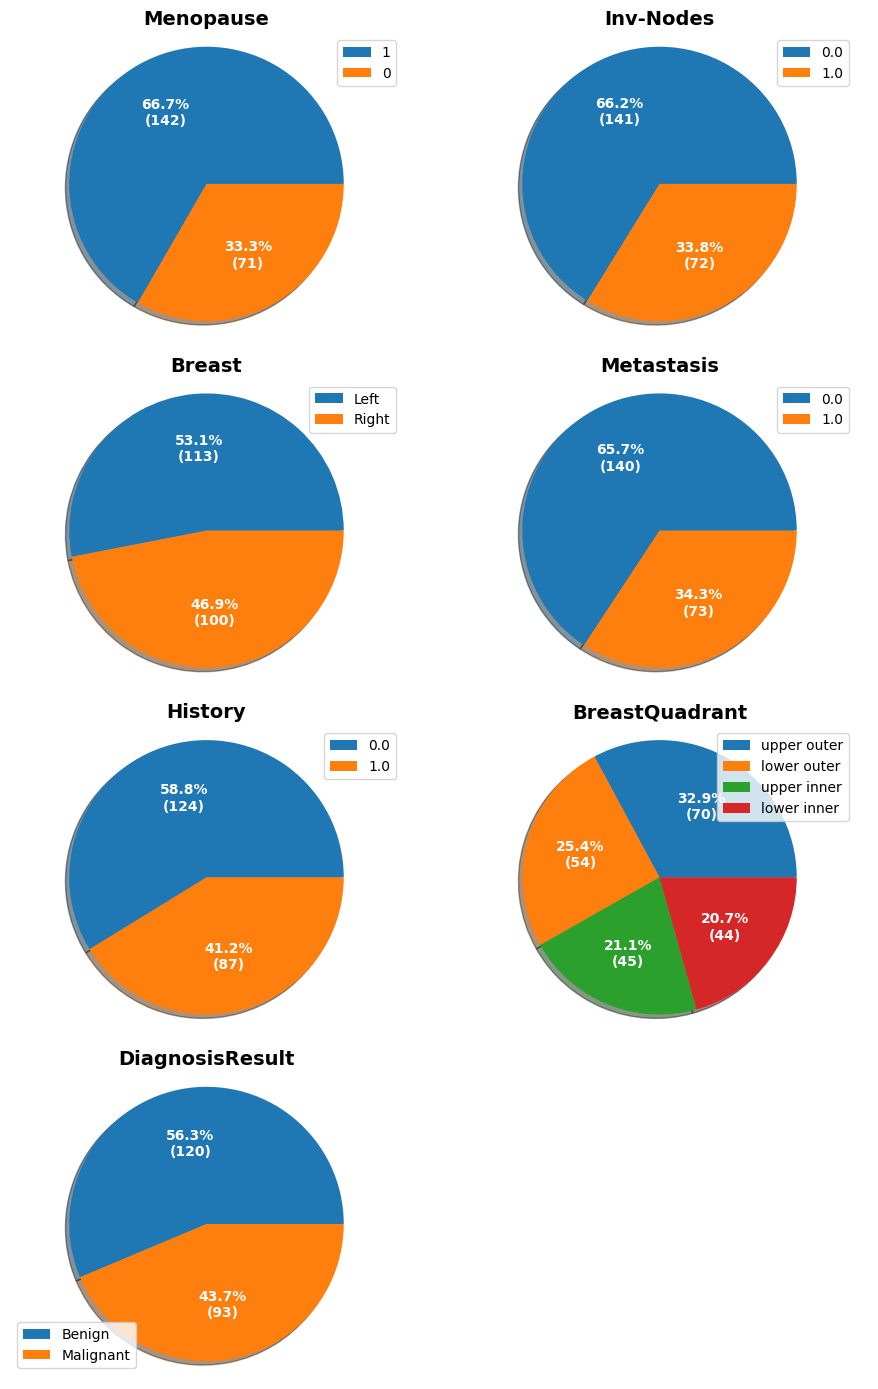

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = ['Menopause', 'Inv-Nodes', 'Breast', 'Metastasis',
                'History', 'BreastQuadrant', 'DiagnosisResult']

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(9, 14))
ax = ax.flat

for i, col in enumerate(cols_to_plot):

    df_class = df[col].value_counts()
    labels = df_class.index
    values = df_class.values

    ax[i].pie(x=values, labels=labels, autopct=autopct_fun(values),
              shadow=True, textprops={'color': 'white', 'fontsize': 10, 'fontweight': 'bold'})
    ax[i].legend(labels, loc="best")
    ax[i].set_title(col, fontsize=14, fontweight="bold", color="black")
    ax[i].axis('equal')

fig.delaxes(ax=ax[7])
fig.tight_layout()
plt.show()

Bigger tumors tend to be malignant

Tumor Size is slightly the most important, followed closely by Age and Inv-Nodes, but all three are relevant for the prediction.

In [ ]:
# Group by diagnosis and calculate mean age
age_by_diagnosis = df.groupby('DiagnosisResult')['Age'].mean()
print(age_by_diagnosis)


DiagnosisResult
Benign       33.208333
Malignant    48.268817
Name: Age, dtype: float64


In [ ]:
import seaborn as sns
import pandas as pd

# Selecting only numerical features for correlation calculation
numerical_features = df.iloc[:, 1:10].select_dtypes(include=['number'])

# Calculating the correlation matrix
correlation = numerical_features.corr()


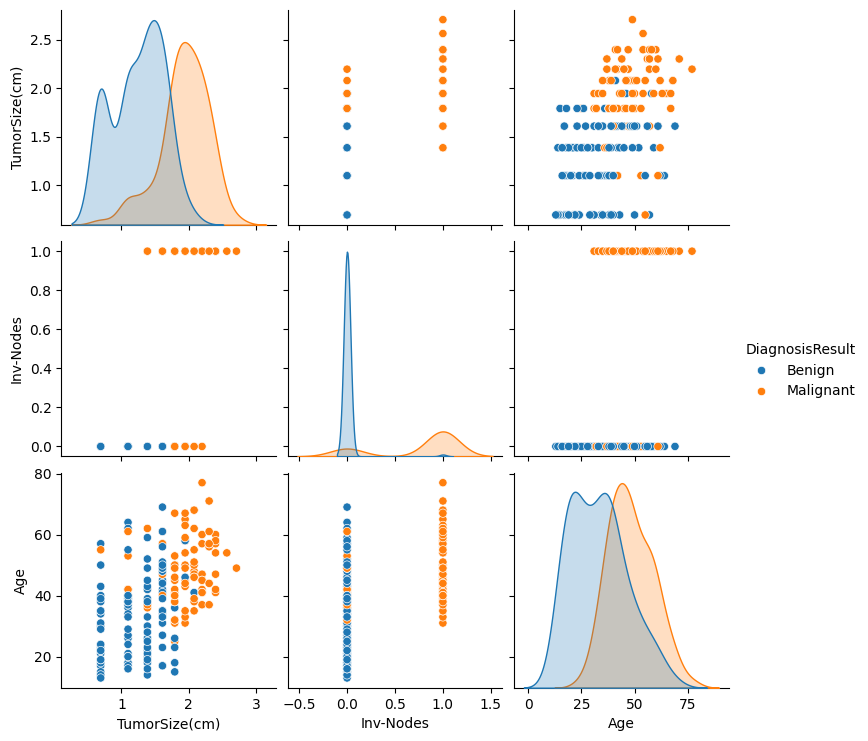

In [ ]:
# Updating column names to the cleaned versions without spaces
sns.pairplot(df[['TumorSize(cm)', 'Inv-Nodes', 'Age', 'DiagnosisResult']], hue='DiagnosisResult')

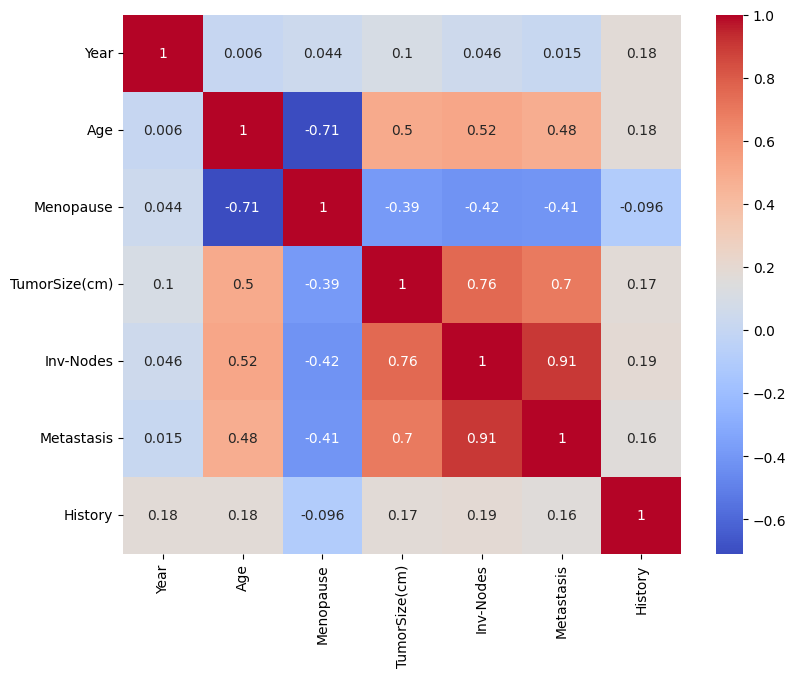

In [ ]:
# Plot heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

The feature 'Age' has a positive correlation with the Tumor Size, number of Invasive nodes and Metastasis, which may indicate a linkage between age and cancer severity and spread.

Tumor size is also very strongly correlated with invasive nodes and metastatis,  meaning tumor size could be an indicator of the severity of breast cancer and how far it has spread.

Invasive nodes are very strongly correlated with metastasis. This  indicates a possible linkage between the spread of cancer to the lymph nodes and it's further spread to other parts of the body.

Patient history is poorly correlated with the other features in the data.

Age shows an approximate normal distribution, which suggests that classification algorithms such as logistic regression would produce efficient estimates.

In [ ]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['S/N', 'Year', 'Age', 'Menopause', 'TumorSize(cm)', 'Inv-Nodes',
       'Breast', 'Metastasis', 'BreastQuadrant', 'History', 'DiagnosisResult'],
      dtype='object')

## 4.2 Data Preprocessing
The tumor size column is log-transformed to reduce skewness

Variables required as numerical input are converted using one-hot encoding.

Feature Scaling is conducted by applying standardization (StandardScaler)

Imputation strategy - missing values are replaced with the column mean (numeric) and mode (categorical)



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Log-transforming the tumor size column:
df['TumorSize(cm)'] = np.log1p(df['TumorSize(cm)'])

# Step 1: Identifying columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Creating preprocessing pipeline with imputation
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Filling missing values with column mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Filling missing with most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

##4.3 Machine Learning Approach
•	Classification Task: Predict Status (Malignant or Benign)

•	Algorithms:

   -   Logistic Regression (Baseline, simple and interpretable)
   -   Support Vector Machine (SVM) (Effective for high-dimensional data)
   -   Random Forest (Robust and provides feature importance)

###Tools & Technologies:
Python, Scikit-learn, Pandas, NumPy, Seaborn, Matplotlib

### Goal: Build predictive models to classify breast tumors using clinical data.



In [ ]:
# Step 3: Defining models with pipelines
models = {
    'Logistic Regression': Pipeline([
        ('preprocess', preprocessor),
        ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
    ]),
    'Support Vector Machine': Pipeline([
        ('preprocess', preprocessor),
        ('classifier', SVC(probability=True, class_weight='balanced', random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocess', preprocessor),
        ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
    ])
}

# Step 4: Stratified Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

##4.4 Evaluation Metrics

•	Accuracy

•	Precision, Recall, and F1-Score (important for imbalanced data)

•	ROC AUC Score


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelBinarizer

for name, pipeline in models.items():
    print(f"\n{name} Cross-Validated Metrics:")

    # Predicted class labels
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)

    # Predicted probabilities for the positive class (Malignant)
    y_proba = cross_val_predict(pipeline, X, y, cv=skf, method='predict_proba')[:, 1]

    # Binary encoding of 'Malignant' = 1, 'Benign' = 0
    lb = LabelBinarizer()
    y_binary = lb.fit_transform(y).ravel()

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, pos_label='Malignant')
    rec = recall_score(y, y_pred, pos_label='Malignant')
    f1 = f1_score(y, y_pred, pos_label='Malignant')
    auc = roc_auc_score(y_binary, y_proba)

    print(f"Accuracy:      {acc:.4f}")
    print(f"Precision:     {prec:.4f}")
    print(f"Recall:        {rec:.4f}")
    print(f"F1 Score:      {f1:.4f}")
    print(f"ROC AUC Score: {auc:.4f}")
    print("\nClassification Report:\n", classification_report(y, y_pred))


Logistic Regression Cross-Validated Metrics:
Accuracy:      0.8920
Precision:     0.9268
Recall:        0.8172
F1 Score:      0.8686
ROC AUC Score: 0.9348

Classification Report:
               precision    recall  f1-score   support

      Benign       0.87      0.95      0.91       120
   Malignant       0.93      0.82      0.87        93

    accuracy                           0.89       213
   macro avg       0.90      0.88      0.89       213
weighted avg       0.89      0.89      0.89       213


Support Vector Machine Cross-Validated Metrics:
Accuracy:      0.8967
Precision:     0.9733
Recall:        0.7849
F1 Score:      0.8690
ROC AUC Score: 0.9202

Classification Report:
               precision    recall  f1-score   support

      Benign       0.86      0.98      0.91       120
   Malignant       0.97      0.78      0.87        93

    accuracy                           0.90       213
   macro avg       0.91      0.88      0.89       213
weighted avg       0.91      0.90   

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelBinarizer
import numpy as np

results = []

for name, pipeline in models.items():
    print(f"\nEvaluating {name}...")

    # Getting cross-validated predictions and probabilities
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)
    # Using try-except block
    try:
        y_proba = cross_val_predict(pipeline, X, y, cv=skf, method='predict_proba')[:, 1]
        has_proba = True
    except AttributeError:
        print(f"Warning: {name} does not support predict_proba. Skipping ROC AUC.")
        has_proba = False


    # Binary encoding the true labels for ROC AUC
    lb = LabelBinarizer()
    y_binary = lb.fit_transform(y).ravel()

    # Calculating metrics
    acc = accuracy_score(y, y_pred)
    # Ensuring pos_label is correctly handled, using the actual label string
    prec = precision_score(y, y_pred, pos_label='Malignant')
    rec = recall_score(y, y_pred, pos_label='Malignant')
    f1 = f1_score(y, y_pred, pos_label='Malignant')
    auc = roc_auc_score(y_binary, y_proba) if has_proba else np.nan

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision (Malignant)': prec,
        'Recall (Malignant)': rec,
        'F1 Score (Malignant)': f1,
        'ROC AUC': auc
    })

# Creating a DataFrame to display results
results_df = pd.DataFrame(results)

# Printing the results table
print("\n--- Model Performance Comparison ---")
print(results_df.round(4))


#Printing classification reports
print("\n--- Classification Reports ---")
for name, pipeline in models.items():
    print(f"\nClassification Report for {name}:")
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)
    print(classification_report(y, y_pred))


Evaluating Logistic Regression...

Evaluating Support Vector Machine...

Evaluating Random Forest...

--- Model Performance Comparison ---
                    Model  Accuracy  Precision (Malignant)  \
0     Logistic Regression    0.8920                 0.9268   
1  Support Vector Machine    0.8967                 0.9733   
2           Random Forest    0.8545                 0.8444   

   Recall (Malignant)  F1 Score (Malignant)  ROC AUC  
0              0.8172                0.8686   0.9348  
1              0.7849                0.8690   0.9202  
2              0.8172                0.8306   0.9405  

--- Classification Reports ---

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      Benign       0.87      0.95      0.91       120
   Malignant       0.93      0.82      0.87        93

    accuracy                           0.89       213
   macro avg       0.90      0.88      0.89       213
weighted avg       0.89      0.89      

##4.5 Visualization

•	Confusion matrix

•	Actual vs. Predicted class distribution

•	Feature importance (using Random Forest and SHAP)


Logistic Regression Confusion Matrix:


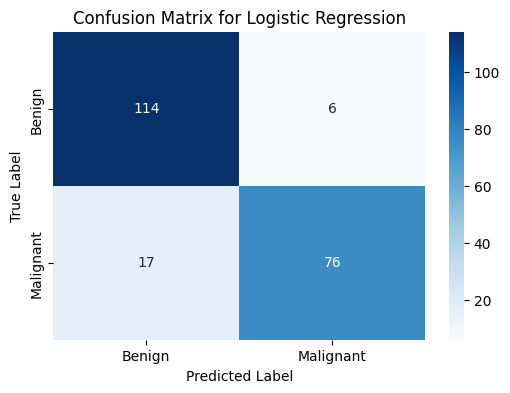


Support Vector Machine Confusion Matrix:


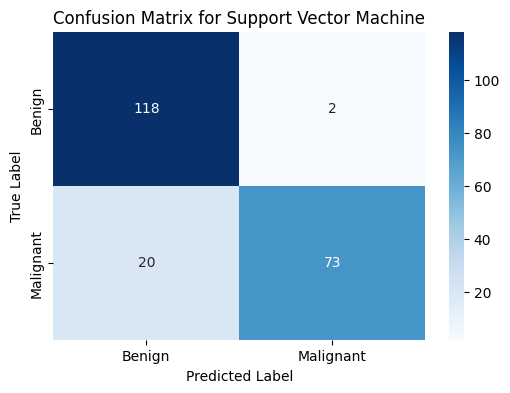


Random Forest Confusion Matrix:


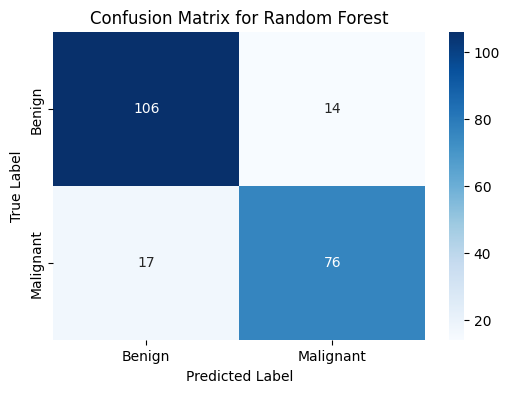

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for name, pipeline in models.items():
    print(f"\n{name} Confusion Matrix:")

    # Getting cross-validated predictions
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)

    # Generating confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Getting the unique class labels from the true labels (y)
    class_labels = np.unique(y)

    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## Parameter Tuning – Random Forest

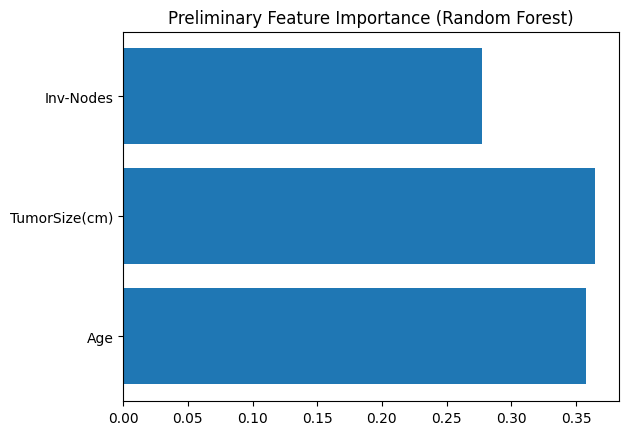

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest Classifier
rf = RandomForestClassifier()

# Fitting the model (using a subset of features for now)
X = df[['Age', 'TumorSize(cm)', 'Inv-Nodes']]  # Selecting relevant features
y = df['DiagnosisResult']
rf.fit(X, y)

# Getting feature importances
feature_importances = rf.feature_importances_

# Visualizing feature importances
plt.barh(X.columns, feature_importances)
plt.title('Preliminary Feature Importance (Random Forest)')
plt.show()

In [ ]:
import pandas as pd
# Defining the metric to determine the "best" model
metric_to_optimize = 'ROC AUC'

# Finding the row with the maximum value for the chosen metric
best_model_row = results_df.loc[results_df[metric_to_optimize].idxmax()]

# Extracting the name of the best model and its score
best_model_name = best_model_row['Model']
best_model_score = best_model_row[metric_to_optimize]

print(f"\n--- Best Model based on {metric_to_optimize} ---")
print(f"Model: {best_model_name}")
print(f"{metric_to_optimize}: {best_model_score:.4f}")

# Printing results
print("\nFull metrics for the best model:")
print(best_model_row)


--- Best Model based on ROC AUC ---
Model: Random Forest
ROC AUC: 0.9405

Full metrics for the best model:
Model                    Random Forest
Accuracy                       0.85446
Precision (Malignant)         0.844444
Recall (Malignant)            0.817204
F1 Score (Malignant)          0.830601
ROC AUC                       0.940457
Name: 2, dtype: object


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np


if 'Random Forest' in models:
    rf_pipeline = models['Random Forest']
else:
    print("Random Forest model not found in the 'models' dictionary.")



param_grid = {
    'classifier__n_estimators': [100, 200, 300], # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30], # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'classifier__class_weight': ['balanced', 'balanced_subsample'] # Handle class imbalance
}

# Initializing GridSearchCV
# We'll use ROC AUC as the scoring metric
grid_search_rf = GridSearchCV(estimator=rf_pipeline,
                              param_grid=param_grid,
                              scoring='roc_auc',
                              cv=skf,
                              n_jobs=-1,
                              verbose=2)

print("Performing Grid Search for Random Forest...")

# Fitting Grid Search
grid_search_rf.fit(X, y)

print("\nGrid Search complete.")

# Getting the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"\nBest parameters found: {best_params_rf}")
print(f"Best ROC AUC score achieved with best parameters: {best_score_rf:.4f}")

# The best model found by Grid Search
best_rf_model = grid_search_rf.best_estimator_

# Evaluating the best model further using cross_val_predict
print("\nEvaluating the best Random Forest model found by Grid Search:")

# Get cross-validated predictions and probabilities from the best model
y_pred_best_rf = cross_val_predict(best_rf_model, X, y, cv=skf)
y_proba_best_rf = cross_val_predict(best_rf_model, X, y, cv=skf, method='predict_proba')[:, 1]

# Binary encode true labels for ROC AUC
lb = LabelBinarizer()
y_binary = lb.fit_transform(y).ravel()

# Calculate metrics for the best model
acc_best_rf = accuracy_score(y, y_pred_best_rf)
prec_best_rf = precision_score(y, y_pred_best_rf, pos_label='Malignant')
rec_best_rf = recall_score(y, y_pred_best_rf, pos_label='Malignant')
f1_best_rf = f1_score(y, y_pred_best_rf, pos_label='Malignant')
auc_best_rf = roc_auc_score(y_binary, y_proba_best_rf)

print(f"Accuracy:      {acc_best_rf:.4f}")
print(f"Precision:     {prec_best_rf:.4f}")
print(f"Recall:        {rec_best_rf:.4f}")
print(f"F1 Score:      {f1_best_rf:.4f}")
print(f"ROC AUC Score: {auc_best_rf:.4f}")
print("\nClassification Report for the best Random Forest model:\n", classification_report(y, y_pred_best_rf))

Performing Grid Search for Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Grid Search complete.

Best parameters found: {'classifier__class_weight': 'balanced_subsample', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best ROC AUC score achieved with best parameters: 0.9595

Evaluating the best Random Forest model found by Grid Search:
Accuracy:      0.8873
Precision:     0.8966
Recall:        0.8387
F1 Score:      0.8667
ROC AUC Score: 0.9499

Classification Report for the best Random Forest model:
               precision    recall  f1-score   support

      Benign       0.88      0.93      0.90       120
   Malignant       0.90      0.84      0.87        93

    accuracy                           0.89       213
   macro avg       0.89      0.88      0.88       213
weighted avg       0.89      0.89      0.89       213



Classification Report for Random Forest:
              precision    recall  f1-score   support

      Benign       0.86      0.88      0.87       120
   Malignant       0.84      0.82      0.83        93

    accuracy                           0.85       213
   macro avg       0.85      0.85      0.85       213
weighted avg       0.85      0.85      0.85       213


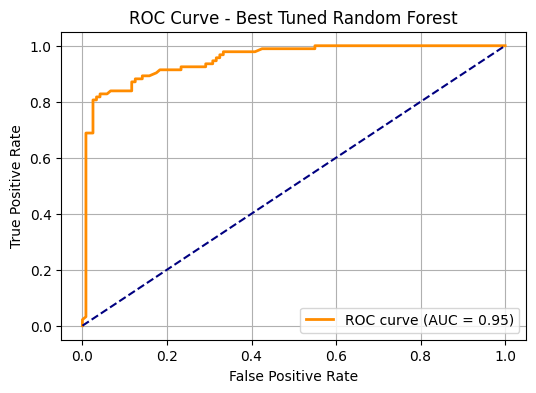

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_binary, y_proba_best_rf)
roc_auc = auc(fpr, tpr)

# Plotting ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Best Tuned Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

##Actual vs. Predicted Class Distribution


Logistic Regression Actual vs. Predicted Class Distribution:


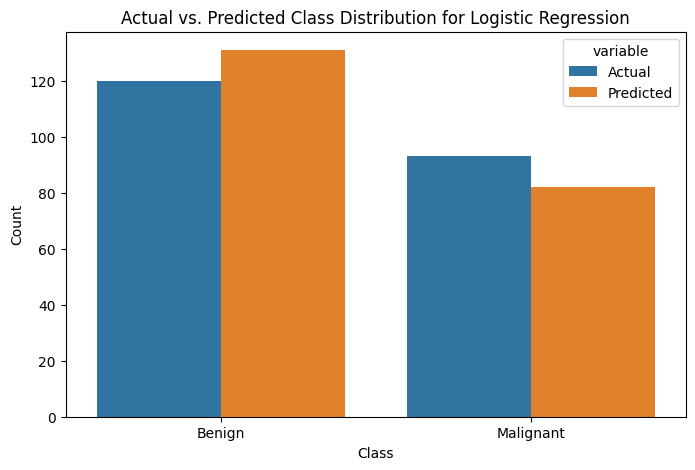


Support Vector Machine Actual vs. Predicted Class Distribution:


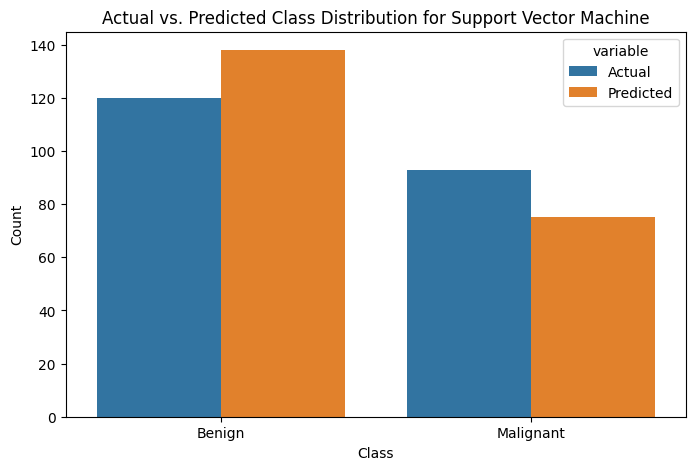


Random Forest Actual vs. Predicted Class Distribution:


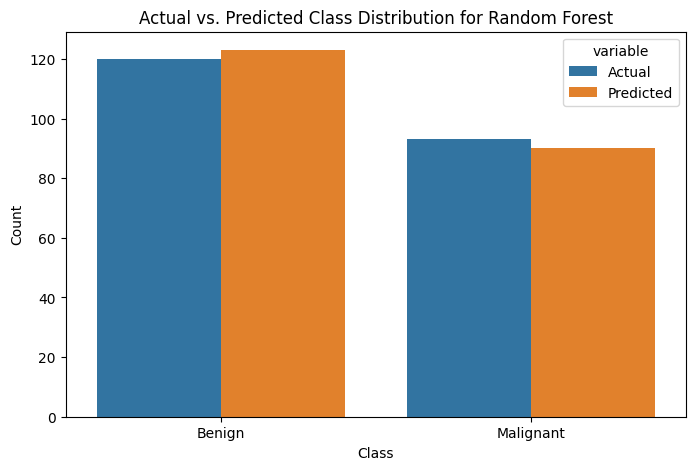

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_predict

for name, pipeline in models.items():
    print(f"\n{name} Actual vs. Predicted Class Distribution:")

    # Getting cross-validated predictions
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)

    # Creating a DataFrame to easily plot counts
    results_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

    plt.figure(figsize=(8, 5))
    sns.countplot(x='value', hue='variable', data=pd.melt(results_df))
    plt.title(f'Actual vs. Predicted Class Distribution for {name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

##Feature importance (using Random Forest and SHAP)

<ipython-input-55-21991f88c63e>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




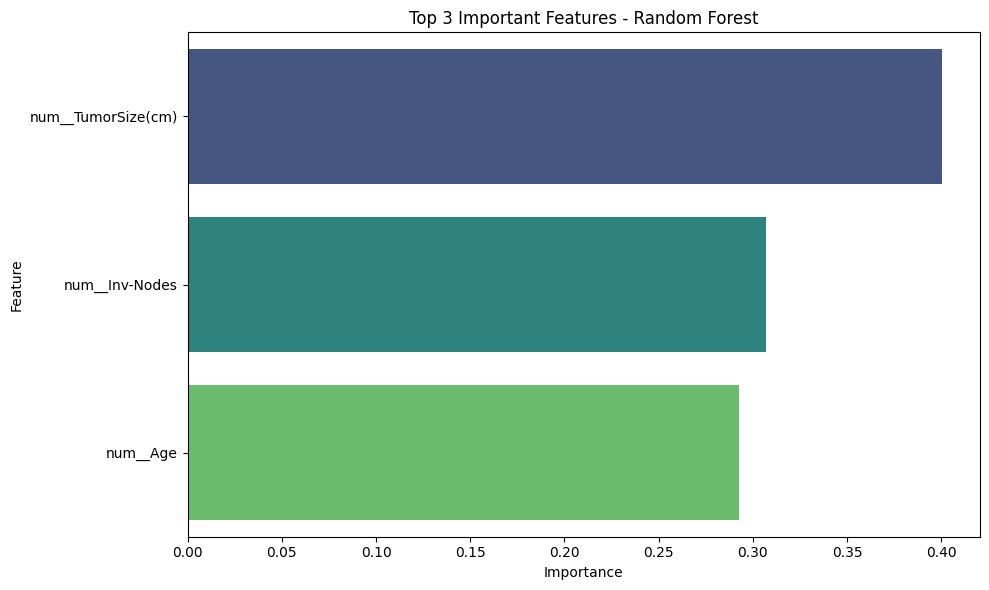

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Accessing the fitted preprocessor from the best model pipeline
fitted_preprocessor = best_rf_model.named_steps['preprocess']

# Getting the transformed feature names using the fitted preprocessor's method (the standard and robust)
try:
    transformed_feature_names = fitted_preprocessor.get_feature_names_out()
except AttributeError:

    print("Warning: Using deprecated get_feature_names(). Consider updating scikit-learn.")
    transformed_feature_names = fitted_preprocessor.get_feature_names()

importances = best_rf_model.named_steps['classifier'].feature_importances_
feat_importance_df = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
# Adjusting the number of features
num_features_to_plot = min(10, len(feat_importance_df))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(num_features_to_plot), palette='viridis')
plt.title("Top {} Important Features - Random Forest".format(num_features_to_plot))
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Tumor Size - After Log Transform')

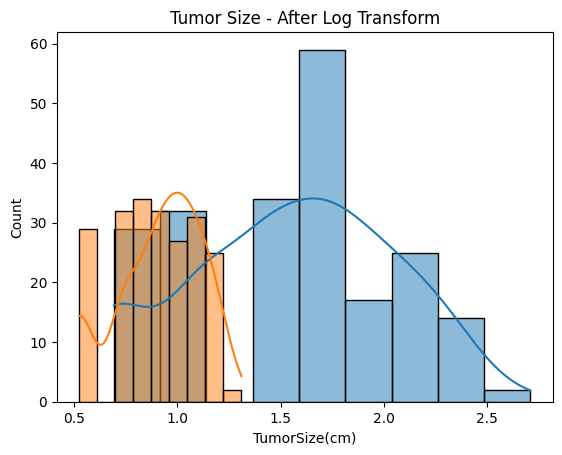

In [ ]:
# Before
sns.histplot(df['TumorSize(cm)'], kde=True)
plt.title("Tumor Size - Before Log Transform")

# After
sns.histplot(np.log1p(df['TumorSize(cm)']), kde=True)
plt.title("Tumor Size - After Log Transform")


#5. Expected Outcomes

•	A trained and validated Random Forest, SVM, and Logistic Regression model that can predict breast cancer classification with high accuracy and interpretability

•	Precision and recall metrics to account for class imbalance and clinical impact

•	A comparative analysis of algorithm strengths and weaknesses

•	An analysis of the most influential features affecting malignancy predictions
________________________________________
#6. Potential Extensions & Future Work
•	Incorporating Deep Learning algorithms for complex feature interactions, eg neural networks.

•	Integrating time-to-event models such as the Cox Regression model used in survival analysis. For example predicting survival time in breast cancer patients.

•	Using multimodal learning with histopathology images

•	Deploying a clinical decision support system using Streamlit or Flask
________________________________________
#7. Clinical Relevance & Significance
This research supports the work of health practitioners by providing  data-driven insights on tumor classification. It helps the identification of malignant tumors with greater efficiency. It also contributes to the  field of biomedical informatics and applied machine learning by assessing the effectiveness of different classifiers in real medical datasets.
________________________________________
#8. Limitations
•  The dataset is small, which limits the generisability of the findings.

• The dataset lacks imaging and genomic data, and this limits the depth and dimensionality of the analysis.

•  There may be demographic imbalances in the dataset, for instance underrepresented races or age groups. This can introduce bias in model predictions and limit generalizability.

•  Feature selection relies on existing structured data, which may omit unstructured clinical notes and physician observations.

•  Real-time validation in clinical workflows and integration with electronic health records (EHR) is beyond the current scope.


• The dataset consists of patient records from a single hospital, which can also introduce bias in the results.
